In [3]:
#ライブラリのインポート
import pandas as pd
import seaborn as sns
import yfinance as yf

#データの準備
df = yf.download("7203.T", start="2020-01-01", end="2025-10-25")
df

/tmp/ipython-input-3774788333.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download("7203.T", start="2020-01-01", end="2025-10-25")
[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,7203.T,7203.T,7203.T,7203.T,7203.T
Date,,,,,
2020-01-06,1270.501099,1280.745680,1264.623037,1276.211257,33361500
2020-01-07,1295.692749,1296.868382,1279.570106,1285.448168,24803500
2020-01-08,1279.234253,1283.432869,1266.470400,1270.501112,28061000
2020-01-09,1288.135254,1291.494146,1282.761005,1288.471164,21265000
2020-01-10,1286.623535,1292.837506,1284.944089,1292.333693,17417000
...,...,...,...,...,...
2025-10-20,3003.000000,3003.000000,2971.000000,2988.500000,20574600
2025-10-21,3005.000000,3021.000000,2988.000000,3017.000000,16336700


In [4]:
#カラム名を確認
print(df.columns)


#namesの意味

MultiIndex([( 'Close', '7203.T'),
            (  'High', '7203.T'),
            (   'Low', '7203.T'),
            (  'Open', '7203.T'),
            ('Volume', '7203.T')],
           names=['Price', 'Ticker'])


In [5]:
#振り直し
df = df.reset_index()
df = df.rename(columns={'Date': 'ds'})
df

Price,ds,Close,High,Low,Open,Volume
Ticker,,7203.T,7203.T,7203.T,7203.T,7203.T
0,2020-01-06,1270.501099,1280.745680,1264.623037,1276.211257,33361500
1,2020-01-07,1295.692749,1296.868382,1279.570106,1285.448168,24803500
2,2020-01-08,1279.234253,1283.432869,1266.470400,1270.501112,28061000
3,2020-01-09,1288.135254,1291.494146,1282.761005,1288.471164,21265000
4,2020-01-10,1286.623535,1292.837506,1284.944089,1292.333693,17417000
...,...,...,...,...,...,...
1415,2025-10-20,3003.000000,3003.000000,2971.000000,2988.500000,20574600
1416,2025-10-21,3005.000000,3021.000000,2988.000000,3017.000000,16336700
1417,2025-10-22,3104.000000,3162.000000,3074.000000,3075.000000,49951100


<Axes: xlabel='ds', ylabel='7203.T'>

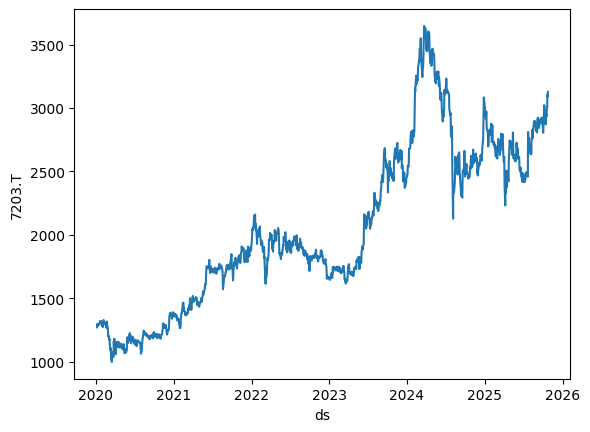

In [6]:
#x・yパラメータには、それぞれの軸に設定する配列を指定
#xパラメータに、to_datetime関数で変換した日付データを指定
time = pd.to_datetime(df['ds'])
sns.lineplot(x=df['ds'], y=df['Close'].squeeze())

In [7]:
#取り込んだデータにおける欠損の有無
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1420 entries, 0 to 1419
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   (ds, )            1420 non-null   datetime64[ns]
 1   (Close, 7203.T)   1420 non-null   float64       
 2   (High, 7203.T)    1420 non-null   float64       
 3   (Low, 7203.T)     1420 non-null   float64       
 4   (Open, 7203.T)    1420 non-null   float64       
 5   (Volume, 7203.T)  1420 non-null   int64         
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 66.7 KB


In [15]:
# 学習データ（〜2024/10/24）
train_df = df[df['ds'] <= pd.to_datetime("2024-10-24")]

# 予測対象期間（2024/10/25〜2025/10/24）
test_df  = df[df['ds'] >  pd.to_datetime("2024-10-24")]


In [16]:
# 日付を datetime に変換
train_df['ds'] = pd.to_datetime(df['ds'])

# Close 列を y にリネーム
train_df = df.rename(columns={'Close': 'y'})


/tmp/ipython-input-3136336727.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['ds'] = pd.to_datetime(df['ds'])


In [17]:
#学習期間：〜2024/10/24

df[df['ds'] < pd.to_datetime("2024-10-24")]

Price,ds,y
Ticker,,7203.T
0,2020-01-06,1270.501099
1,2020-01-07,1295.692749
2,2020-01-08,1279.234253
3,2020-01-09,1288.135254
4,2020-01-10,1286.623535
...,...,...
1170,2024-10-17,2467.447266
1171,2024-10-18,2469.382080
1172,2024-10-21,2458.739990


In [18]:
#予測モデルの学習
#Prophetクラスをインポートし、インスタンス化
from prophet import Prophet
model = Prophet()

In [28]:
#絞り込み
train_df = df[['ds','y']]
train_df.head()

Price,ds,y
Ticker,,7203.T
0,2020-01-06,1270.501099
1,2020-01-07,1295.692749
2,2020-01-08,1279.234253
3,2020-01-09,1288.135254
4,2020-01-10,1286.623535


In [29]:
train_df = train_df.drop(columns=['Price'], errors='ignore')

In [30]:
#df（過去の時系列データ）を引数に指定して、fitメソッドを実行
model.fit(train_df)

TypeError: arg must be a list, tuple, 1-d array, or Series

In [ ]:
#ここから予測
#予測期間：2024/10/25〜2025/10/24
future = model.make_future_train_df(periods=12, freq='MS')
future

In [ ]:
#predictメソッドで予測
forecast = model.predict(future)
forecast

In [ ]:
#関連する項目を抽出
#日付、旅客数の予測値、不確実性区間を表示
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]

In [ ]:
#グラフ上に可視化
fig_forecast = model.plot(forecast)

In [ ]:
#予測の評価

#過去のデータを使って、複数パターンのテストを実施
#cutoffsとhorizonという2つのパラメータで調整可能
cutoffs = pd.to_datetime(['2021-12-01', '2022-12-01', '2023-12-01', '2024-12-01'])

In [ ]:
#テストパターンを作成するcross_validation関数をインポート
from prophet.diagnostics import cross_validation

#cross_validation関数を実行して、1年後を作成
df_cv = cross_validation(model, horizon = '365 days', cutoffs=cutoffs)

In [ ]:
#2024年10月以降のデータが格納されているか確認
train_df_cv

In [ ]:
#評価指標を算出するperformance_metrics関数をインポート
from prophet.diagnostics import performance_metrics

#performance_metrics関数を実行
train_df_p = performance_metrics(df_cv)
train_df_p.head()

In [ ]:
#monthlyパラメータにTrueを指定して、horizon列を月単位で表示?
train_df_p = performance_metrics(train_df_cv, monthly=True)
train_df_p.head()

In [ ]:
#seabornのlineplot関数を活用して、mseの推移を可視化
sns.lineplot(x='horizon', y='mse', data=df_p)

In [ ]:
#coverageも、推移を可視化
sns.lineplot(x='horizon', y='coverage', data=df_p)